In [48]:
import pycaret
import pandas as pd

In [49]:
# ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏ü‡∏•‡πå CSV
data = pd.read_csv('../export_data_jsp01/clean_data_jsps001_1d.csv')

In [50]:
# ‡∏ï‡∏±‡πâ‡∏á 'timestamp' ‡πÄ‡∏õ‡πá‡∏ô index ‡∏´‡∏≤‡∏Å‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏ó‡∏≥
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# ‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤ freq ‡πÉ‡∏´‡πâ‡∏Å‡∏±‡∏ö index
data = data.asfreq('D')  # 'D' ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏£‡∏≤‡∏¢‡∏ß‡∏±‡∏ô

In [51]:
data.tail()

humidity     pm_2_5  temperature
timestamp                                             
2025-02-07 07:00:00  72.053758  27.864365    28.186164
2025-02-08 07:00:00  72.759274  33.923883    28.104894
2025-02-09 07:00:00  69.850659  32.647832    28.231867
2025-02-10 07:00:00  69.598712  32.856690    28.338313
2025-02-11 07:00:00  71.713989  34.038326    28.029813

In [52]:
# ‡πÅ‡∏™‡∏î‡∏á‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ï‡∏¥‡∏°
print("‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ï‡∏¥‡∏°:")
print(data[data.isnull().any(axis=1)])

# ‡πÄ‡∏ï‡∏¥‡∏°‡∏Ñ‡πà‡∏≤‡∏ó‡∏µ‡πà‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏î‡πâ‡∏ß‡∏¢‡∏Å‡∏≤‡∏£ interpolate ‡πÅ‡∏ö‡∏ö‡πÄ‡∏™‡πâ‡∏ô‡∏ï‡∏£‡∏á
data.interpolate(method='linear', inplace=True)

# ‡πÅ‡∏™‡∏î‡∏á‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏¢‡∏±‡∏á‡∏°‡∏µ‡∏Ñ‡πà‡∏≤ NaN ‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡πÄ‡∏ï‡∏¥‡∏° (‡∏ñ‡πâ‡∏≤‡∏°‡∏µ)
missing_rows_after = data[data.isnull().any(axis=1)]
if not missing_rows_after.empty:
    print("‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏¢‡∏±‡∏á‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏´‡∏•‡∏±‡∏á‡πÄ‡∏ï‡∏¥‡∏°:")
    print(missing_rows_after)
else:
    print("‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡πÅ‡∏•‡πâ‡∏ß")


row = data.loc["2023-09-30 07:00:00"]
row

‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏ï‡∏¥‡∏°:
Empty DataFrame
Columns: [humidity, pm_2_5, temperature]
Index: []
‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏´‡∏≤‡∏¢‡πÑ‡∏õ‡πÅ‡∏•‡πâ‡∏ß


humidity       75.436933
pm_2_5         41.697658
temperature    30.098761
Name: 2023-09-30 07:00:00, dtype: float64

In [53]:
data = data[['pm_2_5', 'humidity', 'temperature']]

In [54]:
data["year"] = data.index.year
data["month"] = data.index.month
data["day"] = data.index.day
data["day_of_week"] = data.index.dayofweek  # 0 = Monday, 6 = Sunday
data["week_of_year"] = data.index.isocalendar().week  # ‡∏Ñ‡πà‡∏≤‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô int64

In [55]:
# ‡∏™‡∏°‡∏°‡∏ï‡∏¥‡∏ß‡πà‡∏≤ data ‡∏°‡∏µ index ‡πÄ‡∏õ‡πá‡∏ô datetime ‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏•‡πâ‡∏ß
def assign_season(month):
    if month in [2, 3, 4]:  # ‡∏Å.‡∏û. - ‡πÄ‡∏°.‡∏¢.
        return "summer"        # ‡∏§‡∏î‡∏π‡∏£‡πâ‡∏≠‡∏ô
    elif month in [5, 6, 7]:  # ‡∏û.‡∏Ñ. - ‡∏Å.‡∏Ñ.
        return "early_rainy"   # ‡∏ï‡πâ‡∏ô‡∏§‡∏î‡∏π‡∏ù‡∏ô
    else:  # ‡∏™.‡∏Ñ. - ‡∏°.‡∏Ñ.
        return "late_rainy"    # ‡∏õ‡∏•‡∏≤‡∏¢‡∏§‡∏î‡∏π‡∏ù‡∏ô

season_mapping = {'summer': 0, 'early_rainy': 1, 'late_rainy': 2}
data["season"] = data.index.month.map(assign_season)
data['season'] = data['season'].map(season_mapping)

In [56]:
data['dew_point'] = data['temperature'] - ((100 - data['humidity']) / 5)

In [57]:
data["is_weekend"] = data.index.dayofweek.isin([5, 6]).astype(int)

In [58]:
# ‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á‡∏≠‡∏∏‡∏ì‡∏´‡∏†‡∏π‡∏°‡∏¥‡∏ï‡πà‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ä‡∏∑‡πâ‡∏ô
data["temp_humidity_ratio"] = data["temperature"] / (data["humidity"] + 1)

In [59]:
# ‡∏î‡∏±‡∏ä‡∏ô‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏£‡πâ‡∏≠‡∏ô (Heat Index) ‡∏´‡∏£‡∏∑‡∏≠‡∏≠‡∏∏‡∏ì‡∏´‡∏†‡∏π‡∏°‡∏¥‡∏ó‡∏µ‡πà‡∏£‡∏±‡∏ö‡∏£‡∏π‡πâ
T = data["temperature"]
RH = data["humidity"]

data["heat_index"] = -42.379 + (2.04901523 * T) + (10.14333127 * RH) - (0.22475541 * T * RH) - \
                   (0.00683783 * T**2) - (0.05481717 * RH**2) + (0.00122874 * T**2 * RH) + \
                   (0.00085282 * T * RH**2) - (0.00000199 * T**2 * RH**2)

In [60]:
# ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ä‡∏∑‡πâ‡∏ô‡∏™‡∏±‡∏°‡∏û‡∏±‡∏ó‡∏ò‡πå‡πÄ‡∏ä‡∏¥‡∏á‡∏î‡∏±‡∏ä‡∏ô‡∏µ
data["rh_index"] = data["humidity"] ** 2 / (data["temperature"] + 1)

In [61]:
import pandas as pd
import numpy as np

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå day_of_year
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data['day_of_year'] = data['date'].dt.dayofyear

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå month_sin ‡πÅ‡∏•‡∏∞ month_cos
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå day_of_week_sin ‡πÅ‡∏•‡∏∞ day_of_week_cos
data['day_of_week_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 7)
data['day_of_week_cos'] = np.cos(2 * np.pi * data['day_of_week'] / 7)

lag_size = 30
for i in range(1,lag_size+1):
    data[f'pm_2_5_lag_{i}'] = data['pm_2_5'].shift(i)

data['humidity_lag_1'] = data['humidity'].shift(1)
data['humidity_lag_2'] = data['humidity'].shift(2)
data['humidity_lag_3'] = data['humidity'].shift(3)
data['humidity_lag_7'] = data['humidity'].shift(7)

data['temperature_lag_1'] = data['temperature'].shift(1)
data['temperature_lag_2'] = data['temperature'].shift(2)
data['temperature_lag_3'] = data['temperature'].shift(3)
data['temperature_lag_7'] = data['temperature'].shift(7)

In [62]:
data.columns

Index(['pm_2_5', 'humidity', 'temperature', 'year', 'month', 'day',
       'day_of_week', 'week_of_year', 'season', 'dew_point', 'is_weekend',
       'temp_humidity_ratio', 'heat_index', 'rh_index', 'date', 'day_of_year',
       'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos',
       'pm_2_5_lag_1', 'pm_2_5_lag_2', 'pm_2_5_lag_3', 'pm_2_5_lag_4',
       'pm_2_5_lag_5', 'pm_2_5_lag_6', 'pm_2_5_lag_7', 'pm_2_5_lag_8',
       'pm_2_5_lag_9', 'pm_2_5_lag_10', 'pm_2_5_lag_11', 'pm_2_5_lag_12',
       'pm_2_5_lag_13', 'pm_2_5_lag_14', 'pm_2_5_lag_15', 'pm_2_5_lag_16',
       'pm_2_5_lag_17', 'pm_2_5_lag_18', 'pm_2_5_lag_19', 'pm_2_5_lag_20',
       'pm_2_5_lag_21', 'pm_2_5_lag_22', 'pm_2_5_lag_23', 'pm_2_5_lag_24',
       'pm_2_5_lag_25', 'pm_2_5_lag_26', 'pm_2_5_lag_27', 'pm_2_5_lag_28',
       'pm_2_5_lag_29', 'pm_2_5_lag_30', 'humidity_lag_1', 'humidity_lag_2',
       'humidity_lag_3', 'humidity_lag_7', 'temperature_lag_1',
       'temperature_lag_2', 'temperature_lag_3', '

In [63]:
data_filtered = data.loc['2023-09':]  # ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ï‡∏±‡πâ‡∏á‡πÅ‡∏ï‡πà‡∏Å‡∏±‡∏ô‡∏¢‡∏≤‡∏¢‡∏ô 2023 ‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡πâ‡∏ô‡πÑ‡∏õ

<Axes: xlabel='timestamp'>

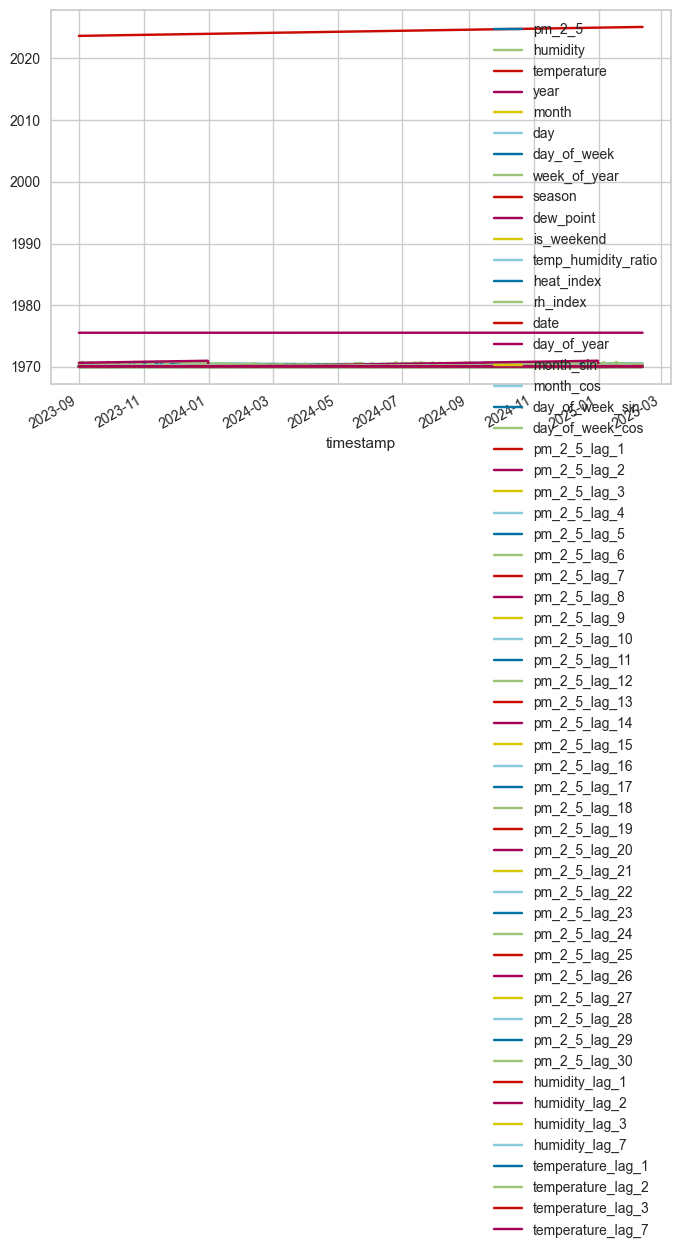

In [64]:
data_filtered.plot()

In [65]:
# ‡∏™‡∏°‡∏°‡∏ï‡∏¥‡∏ß‡πà‡∏≤ data ‡∏°‡∏µ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
total_data = len(data_filtered)

# ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡πá‡∏ô test data
test_days = 30

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏™‡∏±‡∏î‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á 30 ‡∏ß‡∏±‡∏ô‡πÉ‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
test_size = test_days / total_data
test_size

0.05660377358490566

In [66]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_filtered, test_size=test_size, shuffle=False)

In [67]:
train_data.shape

(500, 58)

In [68]:
test_data.shape

(30, 58)

In [69]:
test_data.head(1)

pm_2_5   humidity  temperature  year  month  day  \
timestamp                                                                  
2025-01-13 07:00:00  30.592321  75.720718    24.857799  2025      1   13   

                     day_of_week  week_of_year  season  dew_point  ...  \
timestamp                                                          ...   
2025-01-13 07:00:00            0             3       2  20.001942  ...   

                     pm_2_5_lag_29  pm_2_5_lag_30  humidity_lag_1  \
timestamp                                                           
2025-01-13 07:00:00       5.556624       7.502461       76.964691   

                     humidity_lag_2 humidity_lag_3  humidity_lag_7  \
timestamp                                                            
2025-01-13 07:00:00       73.407775      74.018696       85.925103   

                     temperature_lag_1  temperature_lag_2  temperature_lag_3  \
timestamp                                                                      
2025-01-13 07:00:00          26.640566           28.05223          28.380074   

                     temperature_lag_7  
timestamp                               
2025-01-13 07:00:00          25.455684  

[1 rows x 58 columns]

In [70]:
test_data.tail(1)

pm_2_5   humidity  temperature  year  month  day  \
timestamp                                                                  
2025-02-11 07:00:00  34.038326  71.713989    28.029813  2025      2   11   

                     day_of_week  week_of_year  season  dew_point  ...  \
timestamp                                                          ...   
2025-02-11 07:00:00            1             7       0   22.37261  ...   

                     pm_2_5_lag_29  pm_2_5_lag_30  humidity_lag_1  \
timestamp                                                           
2025-02-11 07:00:00      30.592321      30.049163       69.598712   

                     humidity_lag_2 humidity_lag_3  humidity_lag_7  \
timestamp                                                            
2025-02-11 07:00:00       69.850659      72.759274       71.844422   

                     temperature_lag_1  temperature_lag_2  temperature_lag_3  \
timestamp                                                                      
2025-02-11 07:00:00          28.338313          28.231867          28.104894   

                     temperature_lag_7  
timestamp                               
2025-02-11 07:00:00          27.531455  

[1 rows x 58 columns]

In [71]:
test_data.tail()

pm_2_5   humidity  temperature  year  month  day  \
timestamp                                                                  
2025-02-07 07:00:00  27.864365  72.053758    28.186164  2025      2    7   
2025-02-08 07:00:00  33.923883  72.759274    28.104894  2025      2    8   
2025-02-09 07:00:00  32.647832  69.850659    28.231867  2025      2    9   
2025-02-10 07:00:00  32.856690  69.598712    28.338313  2025      2   10   
2025-02-11 07:00:00  34.038326  71.713989    28.029813  2025      2   11   

                     day_of_week  week_of_year  season  dew_point  ...  \
timestamp                                                          ...   
2025-02-07 07:00:00            4             6       0  22.596916  ...   
2025-02-08 07:00:00            5             6       0  22.656749  ...   
2025-02-09 07:00:00            6             6       0  22.201998  ...   
2025-02-10 07:00:00            0             7       0  22.258056  ...   
2025-02-11 07:00:00            1             7       0  22.372610  ...   

                     pm_2_5_lag_29  pm_2_5_lag_30  humidity_lag_1  \
timestamp                                                           
2025-02-07 07:00:00      37.902901      38.080407       70.853854   
2025-02-08 07:00:00      39.917015      37.902901       72.053758   
2025-02-09 07:00:00      28.920126      39.917015       72.759274   
2025-02-10 07:00:00      30.049163      28.920126       69.850659   
2025-02-11 07:00:00      30.592321      30.049163       69.598712   

                     humidity_lag_2 humidity_lag_3  humidity_lag_7  \
timestamp                                                            
2025-02-07 07:00:00       70.575618      71.844422       68.361925   
2025-02-08 07:00:00       70.853854      70.575618       73.127154   
2025-02-09 07:00:00       72.053758      70.853854       74.573612   
2025-02-10 07:00:00       72.759274      72.053758       66.783050   
2025-02-11 07:00:00       69.850659      72.759274       71.844422   

                     temperature_lag_1  temperature_lag_2  temperature_lag_3  \
timestamp                                                                      
2025-02-07 07:00:00          28.150220          27.676822          27.531455   
2025-02-08 07:00:00          28.186164          28.150220          27.676822   
2025-02-09 07:00:00          28.104894          28.186164          28.150220   
2025-02-10 07:00:00          28.231867          28.104894          28.186164   
2025-02-11 07:00:00          28.338313          28.231867          28.104894   

                     temperature_lag_7  
timestamp                               
2025-02-07 07:00:00          27.174035  
2025-02-08 07:00:00          26.538196  
2025-02-09 07:00:00          26.578263  
2025-02-10 07:00:00          27.428759  
2025-02-11 07:00:00          27.531455  

[5 rows x 58 columns]

In [72]:
test_data.columns

Index(['pm_2_5', 'humidity', 'temperature', 'year', 'month', 'day',
       'day_of_week', 'week_of_year', 'season', 'dew_point', 'is_weekend',
       'temp_humidity_ratio', 'heat_index', 'rh_index', 'date', 'day_of_year',
       'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos',
       'pm_2_5_lag_1', 'pm_2_5_lag_2', 'pm_2_5_lag_3', 'pm_2_5_lag_4',
       'pm_2_5_lag_5', 'pm_2_5_lag_6', 'pm_2_5_lag_7', 'pm_2_5_lag_8',
       'pm_2_5_lag_9', 'pm_2_5_lag_10', 'pm_2_5_lag_11', 'pm_2_5_lag_12',
       'pm_2_5_lag_13', 'pm_2_5_lag_14', 'pm_2_5_lag_15', 'pm_2_5_lag_16',
       'pm_2_5_lag_17', 'pm_2_5_lag_18', 'pm_2_5_lag_19', 'pm_2_5_lag_20',
       'pm_2_5_lag_21', 'pm_2_5_lag_22', 'pm_2_5_lag_23', 'pm_2_5_lag_24',
       'pm_2_5_lag_25', 'pm_2_5_lag_26', 'pm_2_5_lag_27', 'pm_2_5_lag_28',
       'pm_2_5_lag_29', 'pm_2_5_lag_30', 'humidity_lag_1', 'humidity_lag_2',
       'humidity_lag_3', 'humidity_lag_7', 'temperature_lag_1',
       'temperature_lag_2', 'temperature_lag_3', '

In [73]:
from pycaret.regression import RegressionExperiment
exp1 = RegressionExperiment()
exp1.setup(data=train_data, target='pm_2_5', session_id=123, fold=12, remove_outliers = True)

In [74]:
# compare baseline models
best = exp1.compare_models(n_select=15)

In [75]:
model_1 = exp1.create_model('rf')

In [76]:
# exp1.evaluate_model(model_1)

In [ ]:
model_5 = exp1.create_model('gbr')                               

In [105]:
exp1.evaluate_model(model_5)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin‚Ä¶

In [92]:
new_data = test_data.copy().drop(['pm_2_5'], axis=1)
predictions = exp1.predict_model(model_5, data=new_data)
predict_v = predictions['prediction_label']
real = test_data['pm_2_5']

# ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ 1 ‡∏ß‡∏±‡∏ô‡∏Ç‡πâ‡∏≤‡∏á‡∏´‡∏ô‡πâ‡∏≤ ‡∏ï‡πâ‡∏≠‡∏á‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡πÄ‡∏ú‡∏∑‡πà‡∏≠ 2 ‡∏ß‡∏±‡∏ô

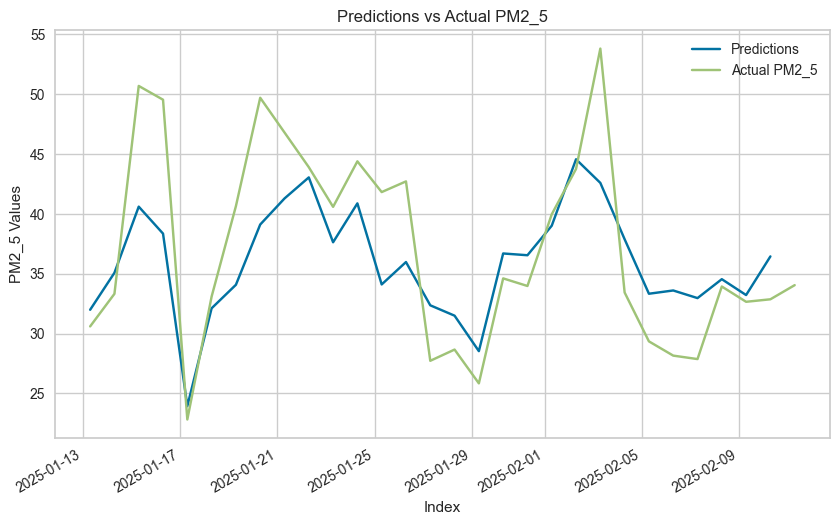

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# ‡∏™‡∏°‡∏°‡∏∏‡∏ï‡∏¥‡∏ß‡πà‡∏≤ result ‡∏Ñ‡∏∑‡∏≠ DataFrame ‡∏ó‡∏µ‡πà‡∏£‡∏ß‡∏° predictions ‡∏Å‡∏±‡∏ö pm_10
result = pd.concat([predict_v.shift(-1), test_data['pm_2_5']], axis=1)
result.columns = ['Predictions', 'Actual PM2_5']  # ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå

# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
result.plot(figsize=(10, 6))

# ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Å‡∏£‡∏≤‡∏ü
plt.title('Predictions vs Actual PM2_5')
plt.xlabel('Index')
plt.ylabel('PM2_5 Values')

# ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.show()

In [94]:
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Extract actual values and predicted values
y_true = test_data["pm_2_5"][:"2025-2-10"]
y_pred = predict_v.shift(-1).dropna(axis=0)

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate MAPE and Accuracy
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Convert to Accuracy %

# Print Results
print(f"R¬≤ Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

R¬≤ Score: 0.5797
Mean Absolute Error (MAE): 4.2214
Root Mean Squared Error (RMSE): 5.3356
Mean Absolute Percentage Error (MAPE): 10.87%
Accuracy: 89.13%


In [95]:
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Extract actual values and predicted values
y_true = test_data["pm_2_5"][:7]
y_pred = (predict_v.shift(-1).dropna(axis=0))[:7]

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate MAPE and Accuracy
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Convert to Accuracy %

# Print Results
print(f"R¬≤ Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

R¬≤ Score: 0.5587
Mean Absolute Error (MAE): 4.7235
Root Mean Squared Error (RMSE): 6.2901
Mean Absolute Percentage Error (MAPE): 10.90%
Accuracy: 89.10%


# Predict 1 by 1

30 ‡∏ß‡∏±‡∏ô  
2025-01-13 07:00:00  
2025-02-11 07:00:00  
7 ‡∏ß‡∏±‡∏ô  
2025-02-05  
2025-02-11  
24 ‡∏ß‡∏±‡∏ô  
2025-01-19 07:00:00  
31 ‡∏ß‡∏±‡∏ô
2025-01-12 07:00:00

In [81]:
# exp1.save_model(model_1, "pm2_5_model_1")

In [104]:
y = test_data.drop(columns='pm_2_5')
y[['pm_2_5_lag_1', 'pm_2_5_lag_2', 'pm_2_5_lag_3', 'pm_2_5_lag_4',
       'pm_2_5_lag_5', 'pm_2_5_lag_6', 'pm_2_5_lag_7', 'pm_2_5_lag_8',
       'pm_2_5_lag_9', 'pm_2_5_lag_10', 'pm_2_5_lag_11', 'pm_2_5_lag_12',
       'pm_2_5_lag_13', 'pm_2_5_lag_14', 'pm_2_5_lag_15', 'pm_2_5_lag_16',
       'pm_2_5_lag_17', 'pm_2_5_lag_18', 'pm_2_5_lag_19', 'pm_2_5_lag_20',
       'pm_2_5_lag_21', 'pm_2_5_lag_22', 'pm_2_5_lag_23', 'pm_2_5_lag_24',
       'pm_2_5_lag_25', 'pm_2_5_lag_26', 'pm_2_5_lag_27', 'pm_2_5_lag_28',
       'pm_2_5_lag_29', 'pm_2_5_lag_30']].tail(10)

pm_2_5_lag_1  pm_2_5_lag_2  pm_2_5_lag_3  pm_2_5_lag_4  \
timestamp                                                                     
2025-02-02 07:00:00     39.954672     33.967001     34.602027     25.836471   
2025-02-03 07:00:00     43.738720     39.954672     33.967001     34.602027   
2025-02-04 07:00:00     53.791623     43.738720     39.954672     33.967001   
2025-02-05 07:00:00     33.424542     53.791623     43.738720     39.954672   
2025-02-06 07:00:00     29.342907     33.424542     53.791623     43.738720   
2025-02-07 07:00:00     28.153336     29.342907     33.424542     53.791623   
2025-02-08 07:00:00     27.864365     28.153336     29.342907     33.424542   
2025-02-09 07:00:00     33.923883     27.864365     28.153336     29.342907   
2025-02-10 07:00:00     32.647832     33.923883     27.864365     28.153336   
2025-02-11 07:00:00     32.856690     32.647832     33.923883     27.864365   

                     pm_2_5_lag_5  pm_2_5_lag_6  pm_2_5_lag_7  pm_2_5_lag_8  \
timestamp                                                                     
2025-02-02 07:00:00     28.658365     27.720182     42.700908     41.808726   
2025-02-03 07:00:00     25.836471     28.658365     27.720182     42.700908   
2025-02-04 07:00:00     34.602027     25.836471     28.658365     27.720182   
2025-02-05 07:00:00     33.967001     34.602027     25.836471     28.658365   
2025-02-06 07:00:00     39.954672     33.967001     34.602027     25.836471   
2025-02-07 07:00:00     43.738720     39.954672     33.967001     34.602027   
2025-02-08 07:00:00     53.791623     43.738720     39.954672     33.967001   
2025-02-09 07:00:00     33.424542     53.791623     43.738720     39.954672   
2025-02-10 07:00:00     29.342907     33.424542     53.791623     43.738720   
2025-02-11 07:00:00     28.153336     29.342907     33.424542     53.791623   

                     pm_2_5_lag_9  pm_2_5_lag_10  ...  pm_2_5_lag_21  \
timestamp                                         ...                  
2025-02-02 07:00:00     44.376693      40.577017  ...      30.049163   
2025-02-03 07:00:00     41.808726      44.376693  ...      30.592321   
2025-02-04 07:00:00     42.700908      41.808726  ...      33.313586   
2025-02-05 07:00:00     27.720182      42.700908  ...      50.672600   
2025-02-06 07:00:00     28.658365      27.720182  ...      49.521314   
2025-02-07 07:00:00     25.836471      28.658365  ...      22.819705   
2025-02-08 07:00:00     34.602027      25.836471  ...      33.084067   
2025-02-09 07:00:00     33.967001      34.602027  ...      40.635307   
2025-02-10 07:00:00     39.954672      33.967001  ...      49.684027   
2025-02-11 07:00:00     43.738720      39.954672  ...      46.786058   

                     pm_2_5_lag_22  pm_2_5_lag_23  pm_2_5_lag_24  \
timestamp                                                          
2025-02-02 07:00:00      28.920126      39.917015      37.902901   
2025-02-03 07:00:00      30.049163      28.920126      39.917015   
2025-02-04 07:00:00      30.592321      30.049163      28.920126   
2025-02-05 07:00:00      33.313586      30.592321      30.049163   
2025-02-06 07:00:00      50.672600      33.313586      30.592321   
2025-02-07 07:00:00      49.521314      50.672600      33.313586   
2025-02-08 07:00:00      22.819705      49.521314      50.672600   
2025-02-09 07:00:00      33.084067      22.819705      49.521314   
2025-02-10 07:00:00      40.635307      33.084067      22.819705   
2025-02-11 07:00:00      49.684027      40.635307      33.084067   

                     pm_2_5_lag_25  pm_2_5_lag_26  pm_2_5_lag_27  \
timestamp                                                          
2025-02-02 07:00:00      38.080407      41.141411      33.257523   
2025-02-03 07:00:00      37.902901      38.080407      41.141411   
2025-02-04 07:00:00      39.917015      37.902901      38.080407   
2025-02-05 07:00:00      28.920126      39.917015      37.902901   
2025-02-06 07:00:00      30.04916

In [108]:
data_compare = data_filtered.loc[:'2025-01-12']
result = pd.DataFrame()

start_date = "2025-01-13"
end_date = "2025-02-11"

model = model_5

for date in pd.date_range(start=start_date, end=end_date, freq="D"):
    # Drop columns
    test_1 = data_filtered
    # ‡∏î‡∏∂‡∏á‡∏ß‡∏±‡∏ô‡∏ô‡∏µ‡πâ‡∏°‡∏≤
    test_1 = test_1.loc[str(date.date())]

    # ‡πÉ‡∏™‡πà‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏õ
    data_compare = pd.concat([data_compare, test_1], axis=0)

    for i in range(1,lag_size+1):
        data_compare[f'pm_2_5_lag_{i}'] = data_compare['pm_2_5'].shift(i)

    # ‡∏î‡∏∂‡∏á
    test_1 = (data_compare.loc[str(date.date())]).drop(columns=['pm_2_5'])
    
    # Drop ‡∏ó‡∏¥‡πâ‡∏á‡∏•‡πà‡∏≤‡∏™‡∏∏‡∏î‡πÉ‡∏ô data_compare
    data_compare = data_compare.drop(data_compare.last_valid_index())
    test_1 = test_1[~test_1.index.duplicated(keep='last')]

    # Predict
    predict_test_1 = exp1.predict_model(model, data=test_1)

    # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ú‡∏•‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏õ‡πÉ‡∏ô data_compare
    data_compare = pd.concat([data_compare, predict_test_1], axis=0)

    # ‡πÅ‡∏ó‡∏ô‡∏ó‡∏µ‡πà‡∏Ñ‡πà‡∏≤‡πÉ‡∏ô‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'pm_2_5' ‡πÉ‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà '2025-01-13' ‡∏î‡πâ‡∏ß‡∏¢‡∏Ñ‡πà‡∏≤‡πÉ‡∏ô‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'prediction_label'
    data_compare.loc[str(date.date()), 'pm_2_5'] = data_compare.loc[str(date.date()), 'prediction_label']

    # ‡∏•‡∏ö‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'prediction_label' (‡∏´‡∏≤‡∏Å‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÅ‡∏Ñ‡πà‡∏ú‡∏•‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢)
    data_compare = data_compare.drop(columns=['prediction_label'])

    # ‡∏Å‡∏£‡∏≠‡∏á‡πÄ‡∏≠‡∏≤‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ã‡πâ‡∏≥‡∏Å‡∏±‡∏ô (index ‡∏ã‡πâ‡∏≥) ‡∏≠‡∏≠‡∏Å‡πÉ‡∏´‡πâ‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡πÅ‡∏Ñ‡πà‡∏ï‡∏±‡∏ß‡πÄ‡∏î‡∏µ‡∏¢‡∏ß
    data_compare = data_compare[~data_compare.index.duplicated(keep='last')]

    # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏•‡∏á result
    result = pd.concat([result, predict_test_1], axis=0)

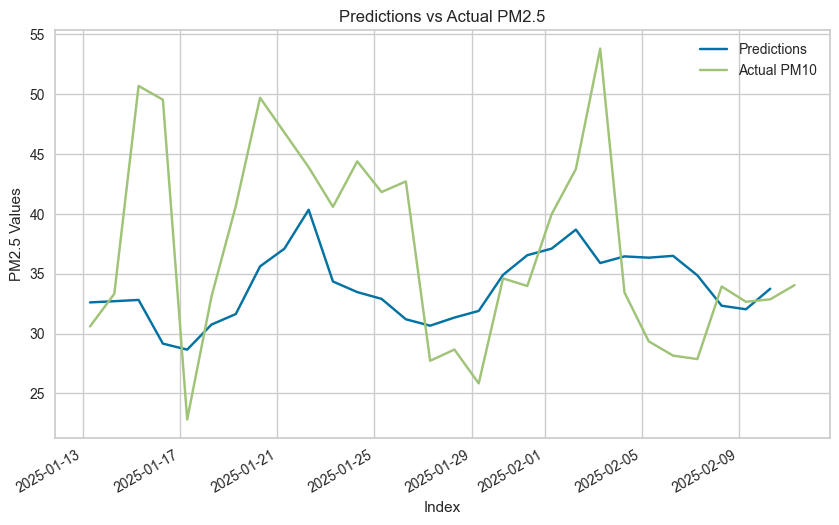

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

real_data = data_filtered.loc[start_date:end_date]
# ‡∏™‡∏°‡∏°‡∏∏‡∏ï‡∏¥‡∏ß‡πà‡∏≤ result ‡∏Ñ‡∏∑‡∏≠ DataFrame ‡∏ó‡∏µ‡πà‡∏£‡∏ß‡∏° predictions ‡∏Å‡∏±‡∏ö pm_10
result_plot = pd.concat([result['prediction_label'].shift(-1), real_data['pm_2_5']], axis=1)
result_plot.columns = ['Predictions', 'Actual PM10']  # ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå

# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
result_plot.plot(figsize=(10, 6))

# ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Å‡∏£‡∏≤‡∏ü
plt.title('Predictions vs Actual PM2.5')
plt.xlabel('Index')
plt.ylabel('PM2.5 Values')

# ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.show()

In [113]:
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_true = real_data["pm_2_5"][:"2025-2-10"]
y_pred = result['prediction_label'].shift(-1).dropna(axis=0)# "prediction_label" contains predictions

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate MAPE and Accuracy
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Convert to Accuracy %

# Print Results
print(f"R¬≤ Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

R¬≤ Score: -0.0832
Mean Absolute Error (MAE): 6.6123
Root Mean Squared Error (RMSE): 8.5661
Mean Absolute Percentage Error (MAPE): 16.75%
Accuracy: 83.25%


In [115]:
y_pred

timestamp
2025-01-13 07:00:00    32.596989
2025-01-14 07:00:00    32.696074
2025-01-15 07:00:00    32.804320
2025-01-16 07:00:00    29.154223
2025-01-17 07:00:00    28.654314
2025-01-18 07:00:00    30.746414
2025-01-19 07:00:00    31.622873
Freq: D, Name: prediction_label, dtype: float64

In [114]:
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_true = real_data["pm_2_5"][:7]
y_pred = (result['prediction_label'].shift(-1).dropna(axis=0))[:7]# "prediction_label" contains predictions

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate MAPE and Accuracy
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Convert to Accuracy %

# Print Results
print(f"R¬≤ Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

R¬≤ Score: -0.3690
Mean Absolute Error (MAE): 8.2917
Root Mean Squared Error (RMSE): 11.0791
Mean Absolute Percentage Error (MAPE): 19.94%
Accuracy: 80.06%


In [ ]:
s

In [86]:
exp1.save_model(model_5, 'gbr_pm_2_5_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['date'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['humidity', 'temperature', 'year',
                                              'month', 'day', 'day_of_week',
                                              'week_of_year', 'season',
                                              'dew_point', 'is_weekend',
                                              'temp_humidity_ratio',
                                              'heat_index', 'rh_index'...
                                              'pm_2_5_lag_8', 'pm_2_5_lag_9',
                                              'pm_2_5_lag_10', 'pm_2_5_lag_11',
                                              'pm_2_5_lag_12', ...],
                                     transformer=SimpleImputer())),
   

# GEN ALL MODEL 

Processing model: OrthogonalMatchingPursuit


Processing model: LassoLars


Processing model: ExtraTreesRegressor


Processing model: Lasso


Processing model: BayesianRidge


Processing model: ElasticNet


Processing model: RandomForestRegressor


Processing model: HuberRegressor


Processing model: AdaBoostRegressor


Processing model: LGBMRegressor


Processing model: GradientBoostingRegressor


Processing model: KNeighborsRegressor


  File "d:\Normal File\Coder\MINI_PROJECT_1-2\pycaret_venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Processing model: Ridge


Processing model: DecisionTreeRegressor


Processing model: DummyRegressor


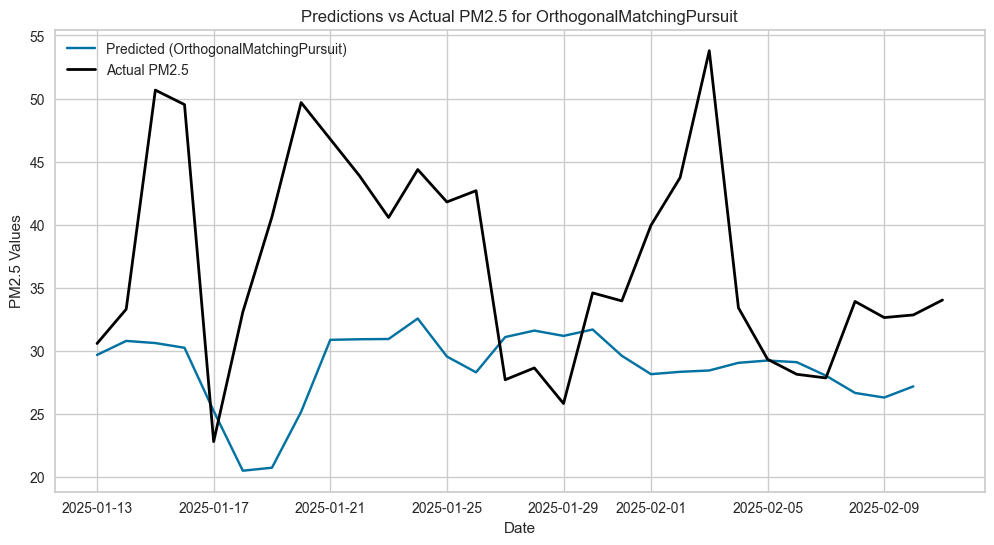

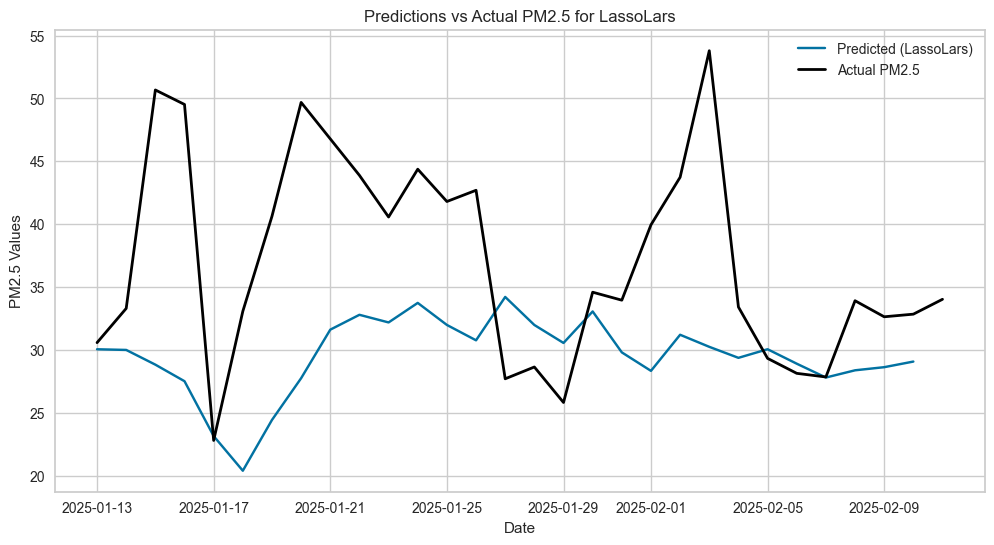

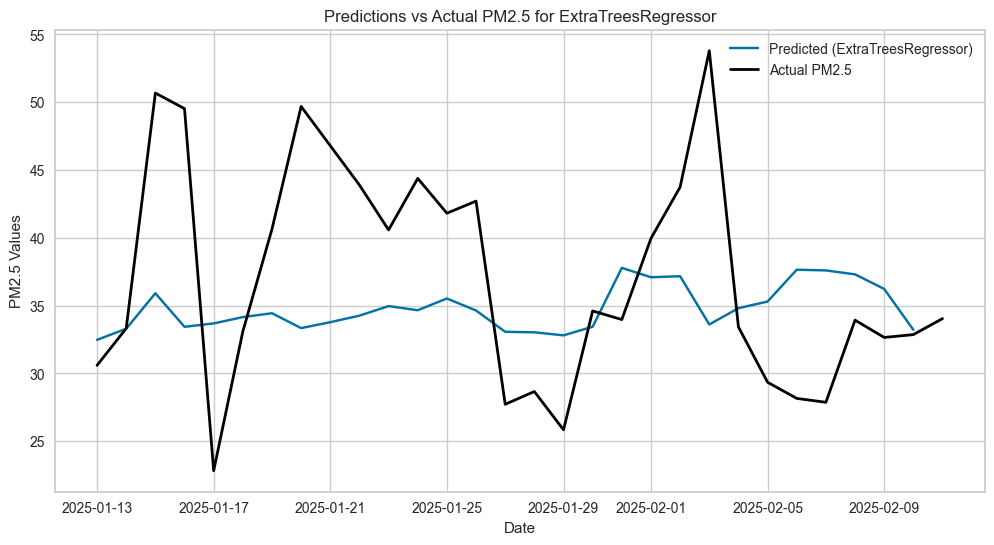

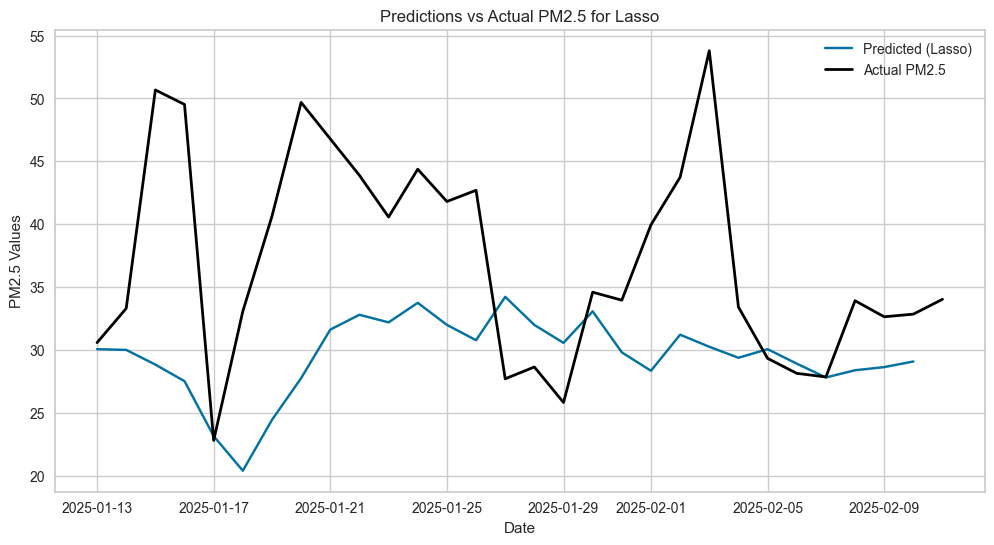

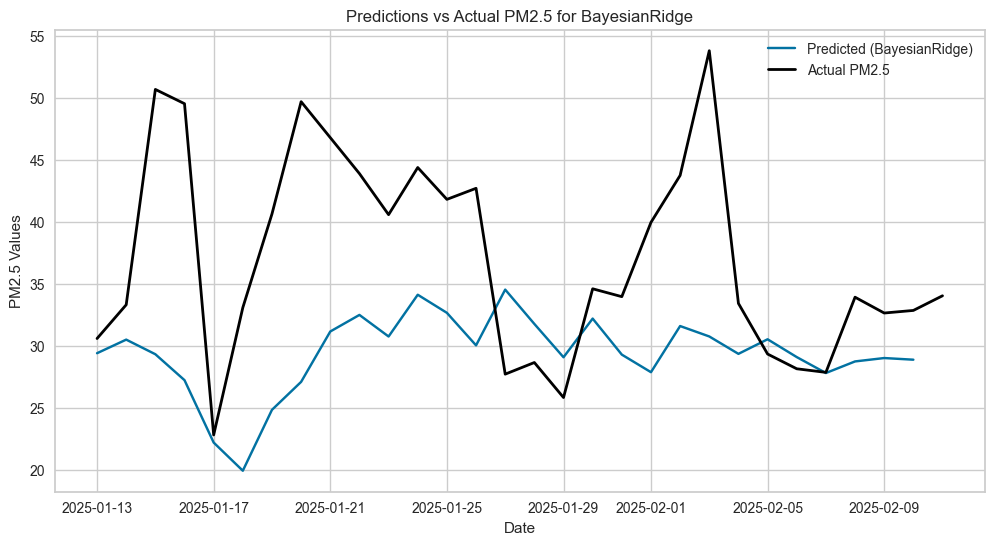

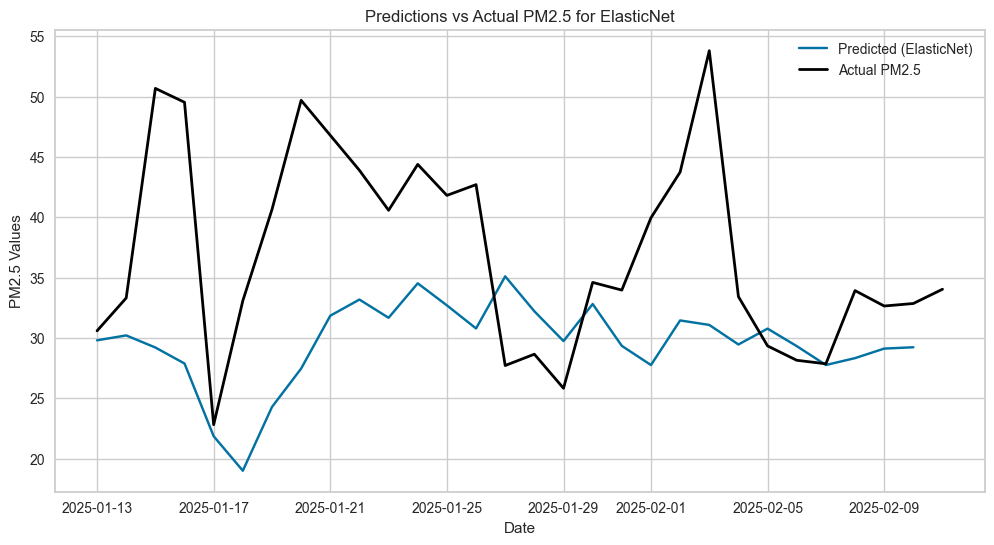

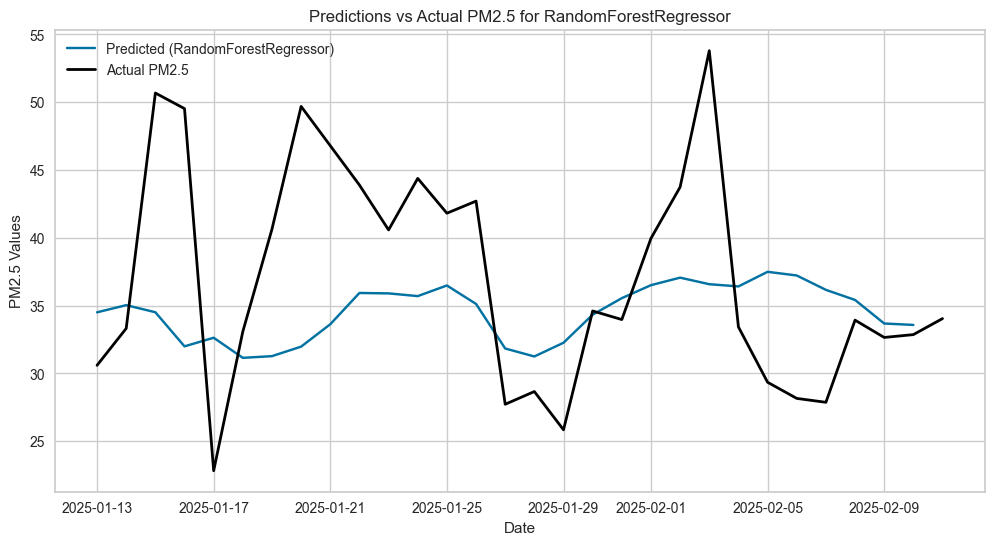

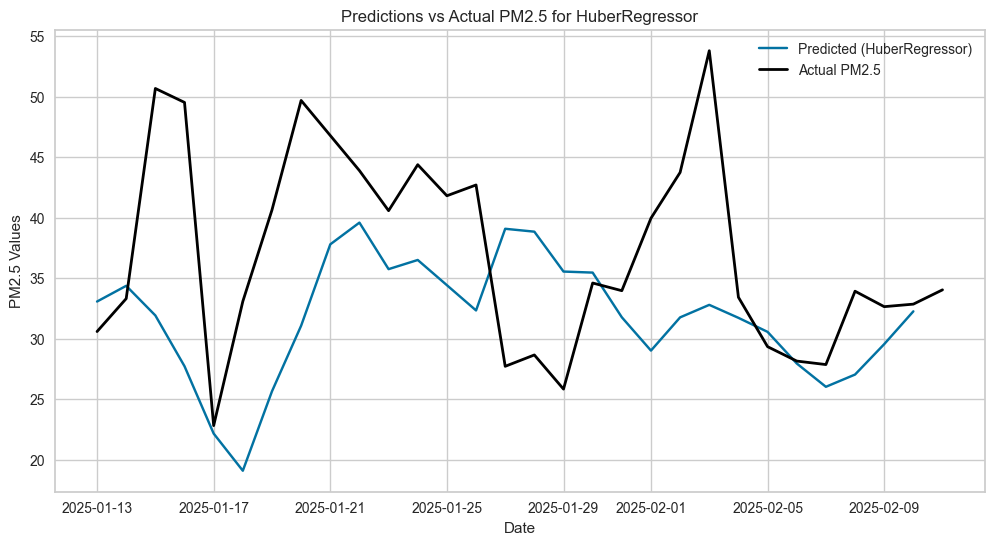

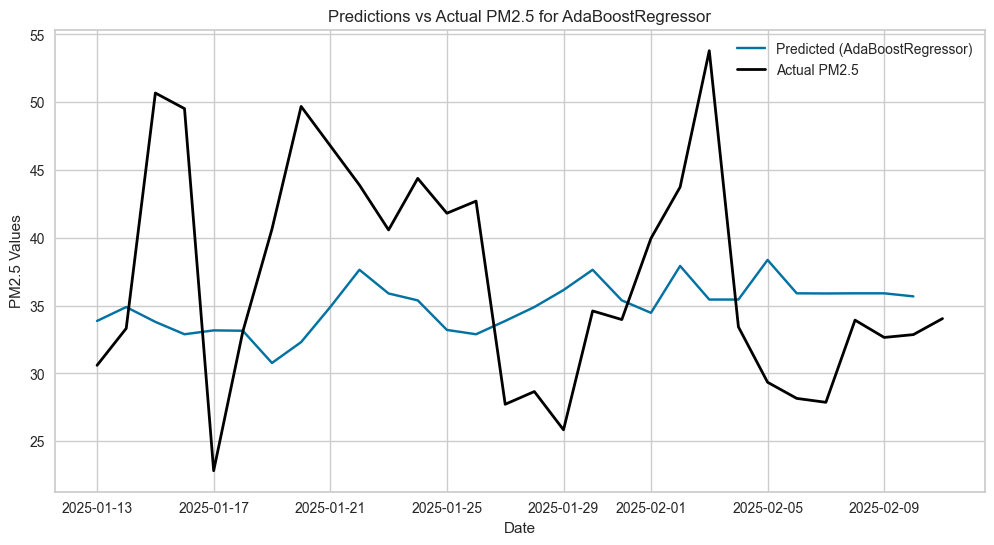

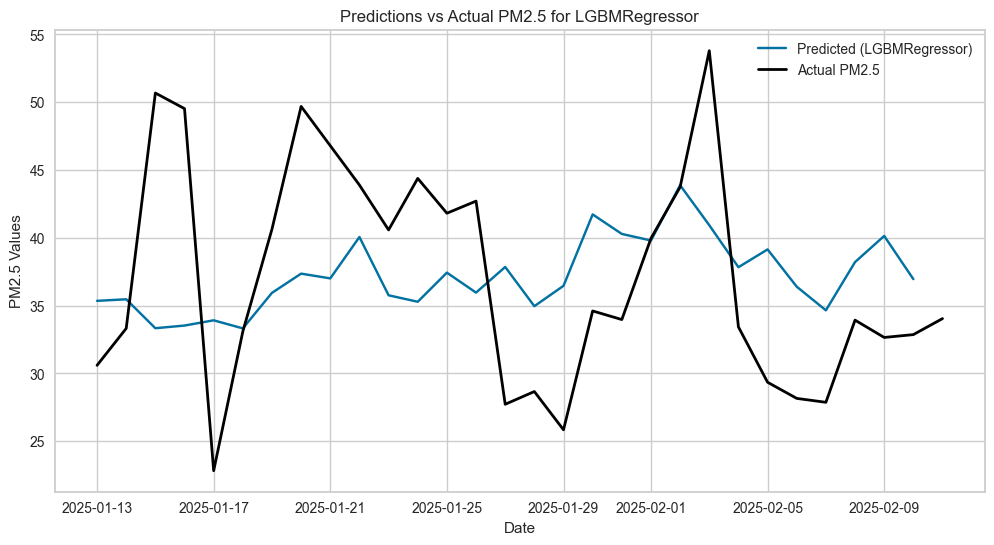

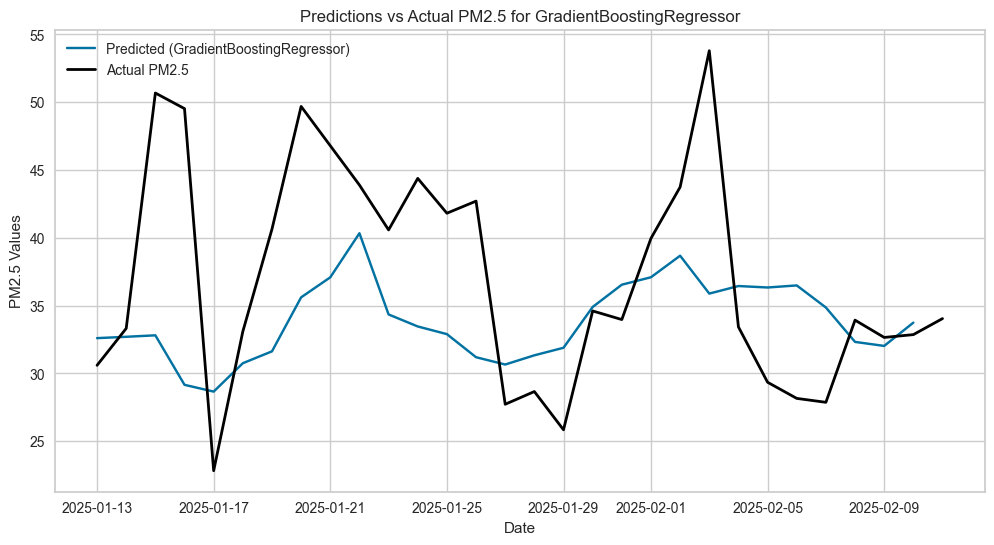

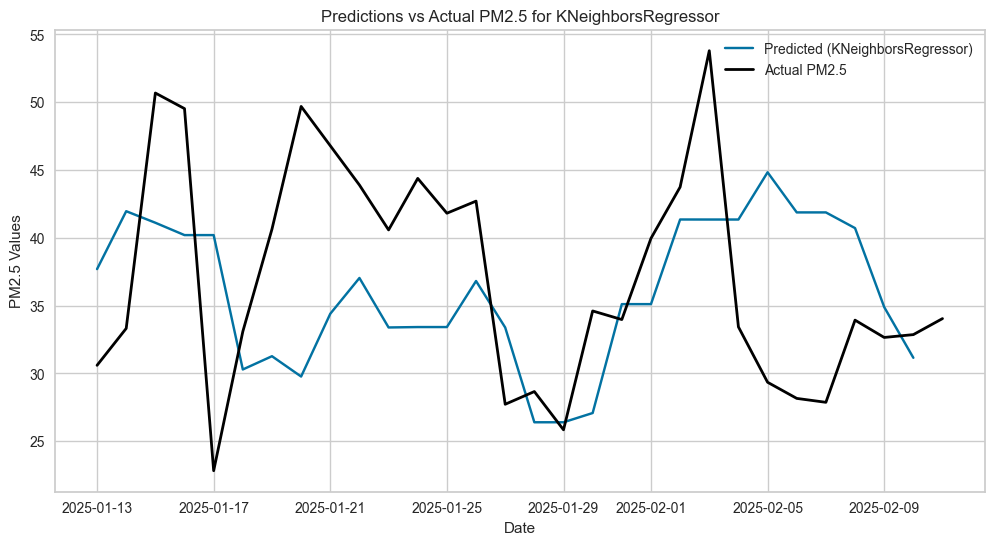

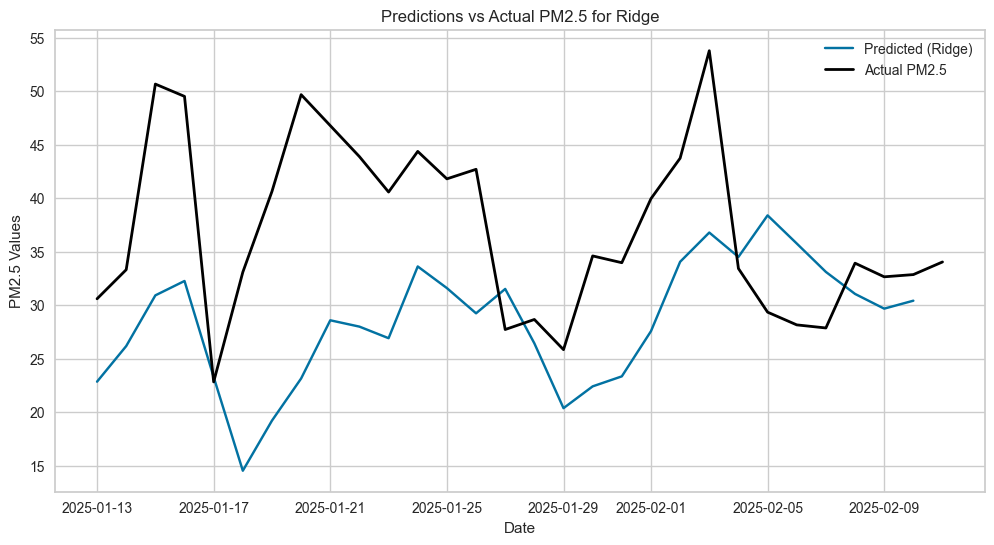

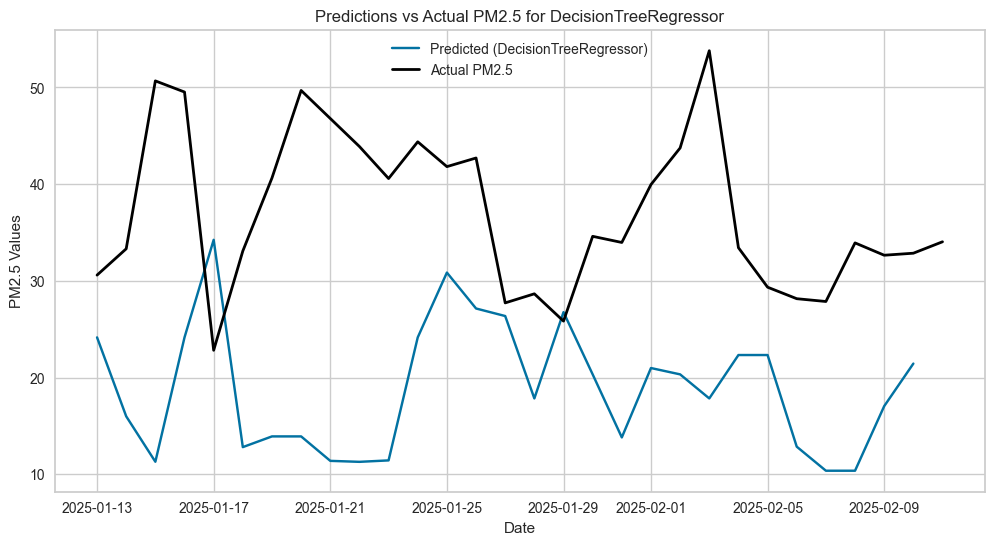

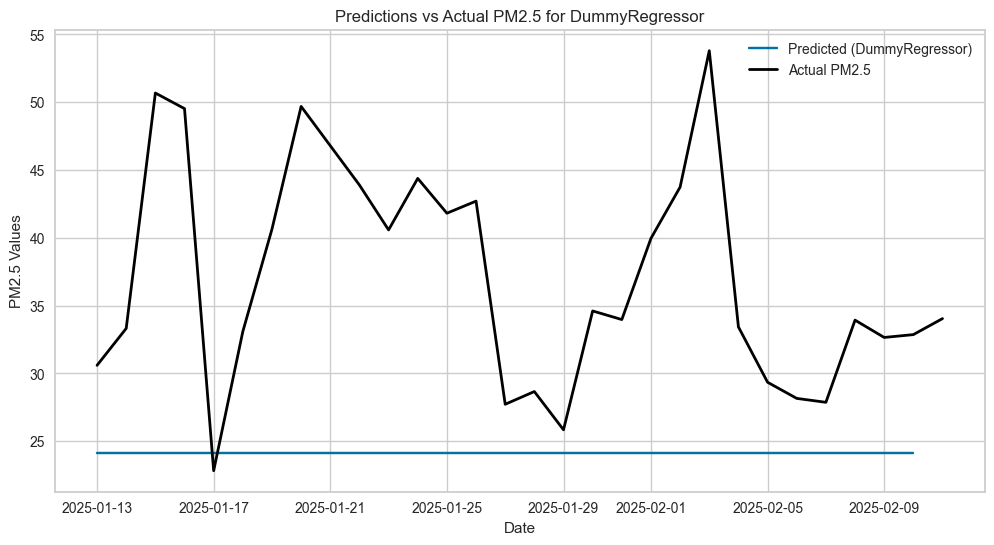

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# ‡πÅ‡∏õ‡∏•‡∏á index ‡πÄ‡∏õ‡πá‡∏ô datetime ‡πÅ‡∏•‡∏∞‡∏•‡∏ö‡πÄ‡∏ß‡∏•‡∏≤‡∏≠‡∏≠‡∏Å
x = data_filtered.copy()
x.index = pd.to_datetime(x.index).normalize()

# ‡πÄ‡∏Å‡πá‡∏ö‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡πÇ‡∏°‡πÄ‡∏î‡∏•
result_dict = {}

# ‡∏£‡∏≤‡∏¢‡∏ä‡∏∑‡πà‡∏≠‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡∏à‡∏≤‡∏Å best_list
model_names = {model.__class__.__name__: model for model in best}

start_date = "2025-01-13"
end_date = "2025-02-11"

# ‡∏ß‡∏ô‡∏•‡∏π‡∏õ‡∏ú‡πà‡∏≤‡∏ô‡∏ó‡∏∏‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
for model_name, model in model_names.items():
    print(f"Processing model: {model_name}")

    data_compare = x.loc[:'2025-01-12'].copy()  # ‡πÉ‡∏ä‡πâ copy() ‡∏õ‡πâ‡∏≠‡∏á‡∏Å‡∏±‡∏ô Warning
    result = pd.DataFrame()

    for date in pd.date_range(start=start_date, end=end_date, freq="D"):
        # ‡∏•‡∏ö‡πÄ‡∏ß‡∏•‡∏≤‡∏≠‡∏≠‡∏Å‡∏à‡∏≤‡∏Å‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà
        date = pd.to_datetime(date).normalize()  # ‡∏•‡∏ö‡πÄ‡∏ß‡∏•‡∏≤‡∏≠‡∏≠‡∏Å‡∏à‡∏≤‡∏Å‡∏ï‡∏±‡∏ß‡πÅ‡∏õ‡∏£ date

        # ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ß‡πà‡∏≤‡πÉ‡∏ô x ‡∏°‡∏µ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÉ‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ô‡∏µ‡πâ‡∏´‡∏£‡∏∑‡∏≠‡πÑ‡∏°‡πà
        if date not in x.index:
            print(f"‚ö†Ô∏è Warning: Date {date} not found in x index.")
            continue

        # ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Ç‡∏≠‡∏á‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£
        test_1 = x.loc[[date]].copy()

        # ‡πÉ‡∏™‡πà‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏õ
        data_compare = pd.concat([data_compare, test_1], axis=0)

        # for i in range(2,rolling_size+1):
        #     test_1[f'pm_2_5_rolling_{i}'] = data_compare['pm_2_5'].rolling(window=i).mean().shift(1)

        # ‡πÄ‡∏û‡∏¥‡πà‡∏° lag feature
        for i in range(1, lag_size + 1):
            test_1[f'pm_2_5_lag_{i}'] = data_compare['pm_2_5'].shift(i).iloc[-1]

        # ‡∏•‡∏ö‡∏Ñ‡πà‡∏≤ NaN ‡∏ó‡∏µ‡πà‡πÄ‡∏Å‡∏¥‡∏î‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£ shift
        test_1 = test_1.dropna()

        # ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ñ‡πà‡∏≤
        predict_test_1 = exp1.predict_model(model, data=test_1)

        # ‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï data_compare
        predict_test_1.index = [date]  # ‡∏Å‡∏≥‡∏´‡∏ô‡∏î index ‡πÄ‡∏õ‡πá‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå
        data_compare.loc[date, 'pm_2_5'] = predict_test_1['prediction_label'].values[0]

        # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
        result = pd.concat([result, predict_test_1], axis=0)

    # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ô‡∏µ‡πâ‡∏•‡∏á dict
    result_dict[model_name] = result

# --------------------------------------------
# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏ó‡∏∏‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
# --------------------------------------------
real_data = x.loc[start_date:end_date]

# ‡∏ß‡∏ô‡∏•‡∏π‡∏õ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü‡∏ó‡∏µ‡∏•‡∏∞‡πÇ‡∏°‡πÄ‡∏î‡∏•
for model_name, result in result_dict.items():
    plt.figure(figsize=(12, 6))
    
    result_plot = pd.concat([result['prediction_label'].shift(-1), real_data['pm_2_5']], axis=1)
    result_plot.columns = ['Predictions', 'Actual PM2.5']

    plt.plot(result_plot.index, result_plot['Predictions'], label=f"Predicted ({model_name})")
    plt.plot(real_data.index, real_data['pm_2_5'], label="Actual PM2.5", color="black", linewidth=2)
    
    # ‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤‡∏Å‡∏£‡∏≤‡∏ü
    plt.title(f'Predictions vs Actual PM2.5 for {model_name}')
    plt.xlabel('Date')
    plt.ylabel('PM2.5 Values')
    plt.legend()

    # ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
    plt.show()

In [88]:
# --------------------------------------------
# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡πÅ‡∏•‡∏∞‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏• Regression Metrics (‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü)
# --------------------------------------------
for model_name, result in result_dict.items():
    y_true = x.loc[start_date:end_date, 'pm_2_5']  # ‡∏Ñ‡πà‡∏≤‡∏à‡∏£‡∏¥‡∏á
    y_pred = result['prediction_label'].shift(-1)  # ‡∏Ñ‡πà‡∏≤‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå

    # ‡∏•‡∏ö NaN ‡∏ó‡∏µ‡πà‡πÄ‡∏Å‡∏¥‡∏î‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£ shift
    valid_idx = y_pred.dropna().index
    y_true = y_true.loc[valid_idx]
    y_pred = y_pred.loc[valid_idx]

    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
    accuracy = 100 - mape  # ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏õ‡πá‡∏ô Accuracy %

    # ‡πÅ‡∏™‡∏î‡∏á‡∏Ñ‡πà‡∏≤ Metrics ‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ô‡∏µ‡πâ
    print("\nüìä Model Performance Metrics:")
    print(f"Model: {model_name}")
    print(f"R¬≤ Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"Accuracy: {accuracy:.2f}%")
    print("-" * 50)


üìä Model Performance Metrics:
Model: OrthogonalMatchingPursuit
R¬≤ Score: -1.1323
Mean Absolute Error (MAE): 9.4956
Root Mean Squared Error (RMSE): 12.0184
Mean Absolute Percentage Error (MAPE): 22.91%
Accuracy: 77.09%
--------------------------------------------------

üìä Model Performance Metrics:
Model: LassoLars
R¬≤ Score: -0.8668
Mean Absolute Error (MAE): 8.7082
Root Mean Squared Error (RMSE): 11.2454
Mean Absolute Percentage Error (MAPE): 20.88%
Accuracy: 79.12%
--------------------------------------------------

üìä Model Performance Metrics:
Model: ExtraTreesRegressor
R¬≤ Score: -0.1277
Mean Absolute Error (MAE): 7.0589
Root Mean Squared Error (RMSE): 8.7403
Mean Absolute Percentage Error (MAPE): 18.52%
Accuracy: 81.48%
--------------------------------------------------

üìä Model Performance Metrics:
Model: Lasso
R¬≤ Score: -0.8658
Mean Absolute Error (MAE): 8.7055
Root Mean Squared Error (RMSE): 11.2425
Mean Absolute Percentage Error (MAPE): 20.87%
Accuracy: 79.13%
--